# MM1 queue with 30 replications:

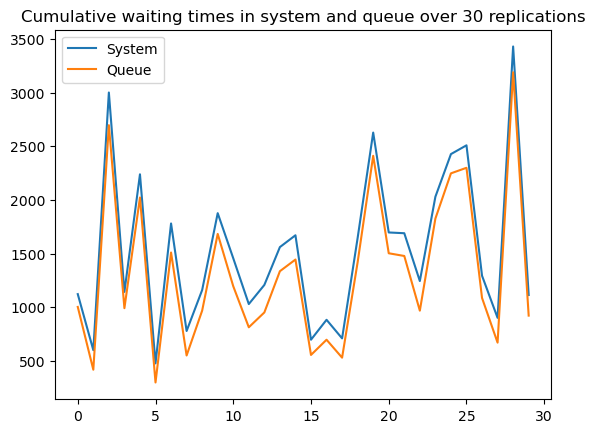

In [1]:
# import libraries
import math
import random
import matplotlib.pyplot as plt

def get_next_arrival_sub(): 
        return random.expovariate(0.25)    

def get_next_dep_sub():
        return random.expovariate(0.2)
 
# Create and initialize list of 160 random arrival and departure times
arrival_times = []
departure_times = []

# Create cumulative list of cumulative waiting times
cumulative_time_sys = []
cumulative_time_queue = []

# Initialize time counter
t = 0

# Initialize replication counter (from 0-30, 0-100, and 0-1,000)
replications = 1

# Initialize next_arrival, next_dep, utilisation, and statistics 
next_arrival = 0
next_dep = 0
util = 0
queue = 0
waiting_time_queue = 0
waiting_time_sys = 0

while replications <= 30:
        if t == 0:
                next_arrival = get_next_arrival_sub()
                arrival_times.append(next_arrival)
                t += next_arrival
                next_dep = float('inf')
                util = 0
                queue = 0
        while t <= 160:
                next_arrival = get_next_arrival_sub()
                next_dep = get_next_dep_sub()

                departure_times.append(next_dep)
                arrival_times.append(next_arrival)

                if next_arrival < next_dep:
                        t += next_arrival
                        if util == 0:
                                util = 1
                                next_arrival = get_next_arrival_sub()
                        else:
                                queue += 1
                                waiting_time_queue += (queue * next_arrival)
                                waiting_time_sys += next_arrival * (util + queue)
                else:
                        t += next_dep
                        if queue >= 1:
                                queue -= 1
                                next_dep = get_next_dep_sub()
                                waiting_time_queue
                                waiting_time_queue += (queue * next_dep)
                                waiting_time_sys += next_dep * (util + queue)

                        else:
                                util = 0
                                next_dep = float('inf')
        else:
                cumulative_time_sys.append(waiting_time_sys)
                cumulative_time_queue.append(waiting_time_queue)
                t = 0
                next_arrival = 0
                next_dep = 0
                util = 0
                queue = 0
                waiting_time_queue = 0
                waiting_time_sys = 0
                replications += 1

# print(cumulative_time_sys, cumulative_time_queue)

"""
# Plot histograms of arrival and departure times to verify distribution
plt.hist(arrival_times, label='Arrival Times')
plt.hist(departure_times, label='Departure Times')
plt.legend(['Arrival', 'Departure'])
plt.show()
"""

# Plot cumulative waiting times across replications
plt.plot(cumulative_time_sys, label='Cumulative Waiting Times in System')
plt.plot(cumulative_time_queue, label='Cumulative Waiting Times in Queue')
plt.legend(['System', 'Queue'])
plt.title('Cumulative waiting times in system and queue over 30 replications')
plt.show()


In [2]:
help(random.expovariate)

Help on method expovariate in module random:

expovariate(lambd) method of random.Random instance
    Exponential distribution.
    
    lambd is 1.0 divided by the desired mean.  It should be
    nonzero.  (The parameter would be called "lambda", but that is
    a reserved word in Python.)  Returned values range from 0 to
    positive infinity if lambd is positive, and from negative
    infinity to 0 if lambd is negative.



# MM1 Queue with 100 Replications

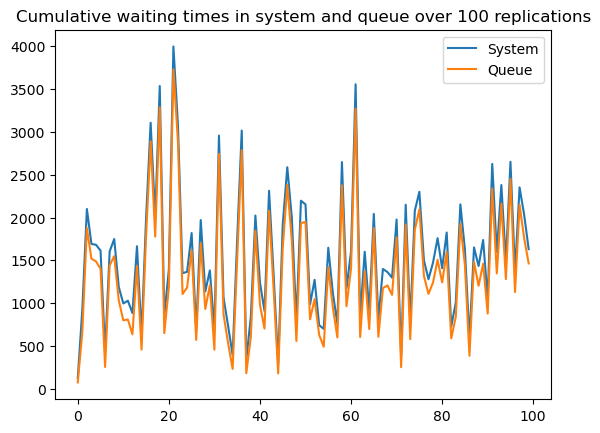

In [3]:
# import libraries
import math
import random
import matplotlib.pyplot as plt

def get_next_arrival_sub(): 
        return random.expovariate(0.25)    

def get_next_dep_sub():
        return random.expovariate(0.2)
 
# Create and initialize list of 160 random arrival and departure times
arrival_times = []
departure_times = []

# Create cumulative list of cumulative waiting times
cumulative_time_sys = []
cumulative_time_queue = []

# Initialize time counter
t = 0

# Initialize replication counter (from 0-30, 0-100, and 0-1,000)
replications = 1

# Initialize next_arrival, next_dep, utilisation, and statistics 
next_arrival = 0
next_dep = 0
util = 0
queue = 0
waiting_time_queue = 0
waiting_time_sys = 0

while replications <= 100:
        if t == 0:
                next_arrival = get_next_arrival_sub()
                arrival_times.append(next_arrival)
                t += next_arrival
                next_dep = float('inf')
                util = 0
                queue = 0
        while t <= 160:
                next_arrival = get_next_arrival_sub()
                next_dep = get_next_dep_sub()

                departure_times.append(next_dep)
                arrival_times.append(next_arrival)

                if next_arrival < next_dep:
                        t += next_arrival
                        if util == 0:
                                util = 1
                                next_arrival = get_next_arrival_sub()
                        else:
                                queue += 1
                                waiting_time_queue += (queue * next_arrival)
                                waiting_time_sys += next_arrival * (util + queue)
                else:
                        t += next_dep
                        if queue >= 1:
                                queue -= 1
                                next_dep = get_next_dep_sub()
                                waiting_time_queue
                                waiting_time_queue += (queue * next_dep)
                                waiting_time_sys += next_dep * (util + queue)

                        else:
                                util = 0
                                next_dep = float('inf')
        else:
                cumulative_time_sys.append(waiting_time_sys)
                cumulative_time_queue.append(waiting_time_queue)
                t = 0
                next_arrival = 0
                next_dep = 0
                util = 0
                queue = 0
                waiting_time_queue = 0
                waiting_time_sys = 0
                replications += 1

# print(cumulative_time_sys, cumulative_time_queue)

"""
# Plot histograms of arrival and departure times to verify distribution
plt.hist(arrival_times, label='Arrival Times')
plt.hist(departure_times, label='Departure Times')
plt.legend(['Arrival', 'Departure'])
plt.show()
"""

# Plot cumulative waiting times across replications
plt.plot(cumulative_time_sys, label='Cumulative Waiting Times in System')
plt.plot(cumulative_time_queue, label='Cumulative Waiting Times in Queue')
plt.legend(['System', 'Queue'])
plt.title('Cumulative waiting times in system and queue over 100 replications')
plt.show()


# MM1 Queue with 1000 Replications:

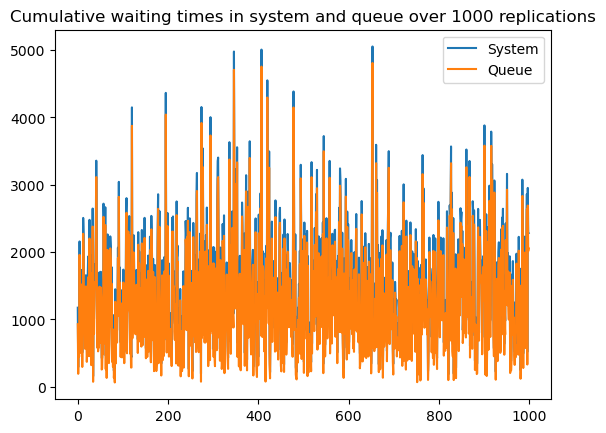

In [4]:
# import libraries
import math
import random
import matplotlib.pyplot as plt

def get_next_arrival_sub(): 
        return random.expovariate(0.25)    

def get_next_dep_sub():
        return random.expovariate(0.2)
 
# Create and initialize list of 160 random arrival and departure times
arrival_times = []
departure_times = []

# Create cumulative list of cumulative waiting times
cumulative_time_sys = []
cumulative_time_queue = []

# Initialize time counter
t = 0

# Initialize replication counter (from 0-30, 0-100, and 0-1,000)
replications = 1

# Initialize next_arrival, next_dep, utilisation, and statistics 
next_arrival = 0
next_dep = 0
util = 0
queue = 0
waiting_time_queue = 0
waiting_time_sys = 0

while replications <= 1000:
        if t == 0:
                next_arrival = get_next_arrival_sub()
                arrival_times.append(next_arrival)
                t += next_arrival
                next_dep = float('inf')
                util = 0
                queue = 0
        while t <= 160:
                next_arrival = get_next_arrival_sub()
                next_dep = get_next_dep_sub()

                departure_times.append(next_dep)
                arrival_times.append(next_arrival)

                if next_arrival < next_dep:
                        t += next_arrival
                        if util == 0:
                                util = 1
                                next_arrival = get_next_arrival_sub()
                        else:
                                queue += 1
                                waiting_time_queue += (queue * next_arrival)
                                waiting_time_sys += next_arrival * (util + queue)
                else:
                        t += next_dep
                        if queue >= 1:
                                queue -= 1
                                next_dep = get_next_dep_sub()
                                waiting_time_queue
                                waiting_time_queue += (queue * next_dep)
                                waiting_time_sys += next_dep * (util + queue)

                        else:
                                util = 0
                                next_dep = float('inf')
        else:
                cumulative_time_sys.append(waiting_time_sys)
                cumulative_time_queue.append(waiting_time_queue)
                t = 0
                next_arrival = 0
                next_dep = 0
                util = 0
                queue = 0
                waiting_time_queue = 0
                waiting_time_sys = 0
                replications += 1

# print(cumulative_time_sys, cumulative_time_queue)

"""
# Plot histograms of arrival and departure times to verify distribution
plt.hist(arrival_times, label='Arrival Times')
plt.hist(departure_times, label='Departure Times')
plt.legend(['Arrival', 'Departure'])
plt.show()
"""

# Plot cumulative waiting times across replications
plt.plot(cumulative_time_sys, label='Cumulative Waiting Times in System')
plt.plot(cumulative_time_queue, label='Cumulative Waiting Times in Queue')
plt.legend(['System', 'Queue'])
plt.title('Cumulative waiting times in system and queue over 1000 replications')
plt.show()
